In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
import mindscope_utilities
import mindscope_utilities.ophys

pd.set_option('display.max_columns', 500)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data_dir =  "/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/neuromatch_data"

experiment_table = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_experiment_table.parquet'))
neural_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_neural_data.parquet'))
stimulus_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_stimulus_data.parquet'))

In [4]:
experiment_table

,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
1,958527488,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402076,familiar
2,958527471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402115,familiar
3,958527474,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402113,familiar
4,958527479,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402124,familiar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,853363745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028144,VisualBehaviorMultiscope,350,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085397300,novel
110,853363756,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028147,VisualBehaviorMultiscope,65,VISl,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085397346,novel
111,853363751,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028150,VisualBehaviorMultiscope,167,VISl,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085396869,novel
112,853363747,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028135,VisualBehaviorMultiscope,75,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085397399,novel


In [6]:
neural_data

,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events,ophys_experiment_id,ophys_session_id
0,8.70512,1080723131,1086618338,0.538217,0.000000,0.000000,958527481,954954402
1,8.79832,1080723131,1086618338,0.196982,0.000000,0.000000,958527481,954954402
2,8.89152,1080723131,1086618338,0.229645,0.000000,0.000000,958527481,954954402
3,8.98473,1080723131,1086618338,0.599996,0.000000,0.000000,958527481,954954402
4,9.07793,1080723131,1086618338,0.217179,0.000000,0.000000,958527481,954954402
...,...,...,...,...,...,...,...,...
48256,4509.54717,1080852997,1086551114,5.430897,3.294402,1.555398,853363739,852794141
48257,4509.64043,1080852997,1086551114,6.098658,0.000000,1.213015,853363739,852794141
48258,4509.73369,1080852997,1086551114,5.567645,0.000000,0.767153,853363739,852794141
48259,4509.82695,1080852997,1086551114,4.150718,0.000000,0.389025,853363739,852794141


In [7]:
stimulus_data

,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change,ophys_session_id
0,0,0.25020,18001.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,17986,308.75313,309.00333,False,954954402
1,1,0.25020,18046.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,18031,309.50374,309.75394,False,954954402
2,2,0.25017,18091.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,18076,310.25441,310.50458,False,954954402
3,3,0.25026,18136.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,18121,311.00496,311.25522,False,954954402
4,4,0.25020,18181.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4,False,18166,311.75558,312.00578,False,954954402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,4796,0.25020,233862.0,2,im075,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4640,False,233847,3909.88147,3910.13167,False,852794141
4797,4797,0.25017,233907.0,2,im075,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4641,False,233892,3910.63209,3910.88226,False,852794141
4798,4798,0.25020,233952.0,2,im075,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4642,False,233937,3911.38269,3911.63289,False,852794141
4799,4799,0.25024,233997.0,2,im075,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4643,False,233982,3912.13328,3912.38352,False,852794141


In [10]:
print('image set types:\n{}'.format(experiment_table['image_set'].value_counts()))

image set types:
novel       62
familiar    52
Name: image_set, dtype: int64


In [11]:
print('stimulus presentations can be changes: {}'.format(stimulus_data['is_change'].unique()))

stimulus presentations can be changes: [False  True]


In [13]:
print('cre lines (cell types) included in this dataset are:\n{}'.format(experiment_table['cre_line'].value_counts()))

cre lines (cell types) included in this dataset are:
Vip-IRES-Cre    82
Sst-IRES-Cre    32
Name: cre_line, dtype: int64


In [14]:
print('there are {} mice in this dataset'.format(len(experiment_table['mouse_id'].unique()),))

there are 12 mice in this dataset


In [16]:
print('there are {} neurons in this dataset'.format(len(neural_data['cell_roi_id'].unique()),))

there are 1652 neurons in this dataset


## We can calculate the response of a cell to a given set of events using the `event_triggered_response` function in `mindscope_utilities`.

In [30]:
%%time
cell_roi_id = 1080722726
session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
omission_triggered_response = mindscope_utilities.event_triggered_response(
    data = neural_data.query('cell_roi_id == @cell_roi_id'),
    t = 'timestamps',
    y = 'dff',
    event_times = stimulus_data.query('ophys_session_id == @session_id and omitted')['start_time'],
    t_before = 2,
    t_after = 2,
    output_sampling_rate = 50
)

CPU times: user 1.46 s, sys: 1.54 s, total: 3.01 s
Wall time: 2.17 s


<AxesSubplot:xlabel='time', ylabel='dff'>

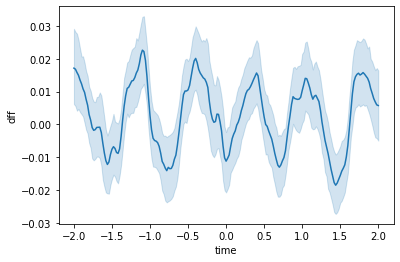

In [31]:
sns.lineplot(
    data = omission_triggered_response,
    x = 'time',
    y = 'dff'
)

In [32]:
omission_triggered_responses = []
cell_roi_ids = neural_data['cell_roi_id'].unique()
for cell_roi_id in tqdm(cell_roi_ids):
    session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.query('cell_roi_id == @cell_roi_id'),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    omission_triggered_responses.append(this_cell_response)
    
omission_triggered_responses = pd.concat(omission_triggered_responses)

100%|██████████| 1652/1652 [31:49<00:00,  1.16s/it]


### Now merge in the experiment table so we have access to metadata

In [35]:
omission_triggered_responses = omission_triggered_responses.merge(
    neural_data[['cell_roi_id','ophys_experiment_id']].drop_duplicates(),
    left_on = 'cell_roi_id',
    right_on = 'cell_roi_id',
    how='left'
).merge(
    experiment_table,
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id'
)

In [36]:
omission_triggered_responses

,time,dff,event_number,event_time,cell_roi_id,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,-2.00,-0.089904,0,316.24258,1080723131,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
1,-1.98,-0.089904,0,316.24258,1080723131,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
2,-1.96,-0.089904,0,316.24258,1080723131,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
3,-1.94,-0.076889,0,316.24258,1080723131,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
4,-1.92,-0.050858,0,316.24258,1080723131,958527481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0,67.0,2,954954402,953982960,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-24 16:00:00.000000,OPHYS_3_images_A,1085402098,familiar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56727220,1.92,-0.146645,155,3903.10928,1080852997,853363739,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028141,VisualBehaviorMultiscope,275,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085395966,novel
56727221,1.94,-0.109424,155,3903.10928,1080852997,853363739,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028141,VisualBehaviorMultiscope,275,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085395966,novel
56727222,1.96,-0.109424,155,3903.10928,1080852997,853363739,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028141,VisualBehaviorMultiscope,275,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085395966,novel
56727223,1.98,-0.109424,155,3903.10928,1080852997,853363739,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,440631,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,852794141,852974537,1018028141,VisualBehaviorMultiscope,275,VISp,2019-04-17 08:54:40.065688,OPHYS_4_images_B,1085395966,novel


In [41]:
mean_df = omission_triggered_responses.groupby(['cell_roi_id','time'])[['dff']].mean().reset_index()
mean_df

,cell_roi_id,time,dff
0,1080624718,-2.00,0.031242
1,1080624718,-1.98,0.030440
2,1080624718,-1.96,0.027920
3,1080624718,-1.94,0.025591
4,1080624718,-1.92,0.022923
...,...,...,...
332047,1081961496,1.92,0.075536
332048,1081961496,1.94,0.076580
332049,1081961496,1.96,0.078066
332050,1081961496,1.98,0.077477


<AxesSubplot:xlabel='time', ylabel='dff'>

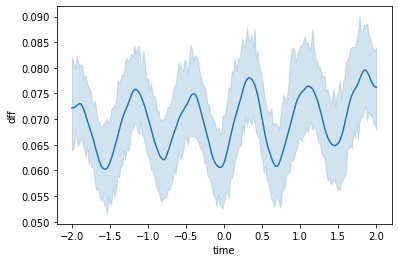

In [42]:
sns.lineplot(
    data = mean_df,
    x = 'time',
    y = 'dff',
    n_boot = 100
)

<AxesSubplot:xlabel='time', ylabel='dff'>

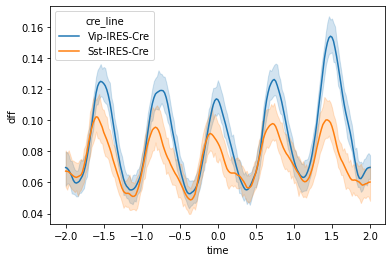

In [73]:
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100,
    hue = 'cre_line'
)

<AxesSubplot:xlabel='time', ylabel='dff'>

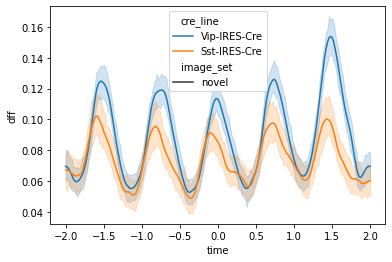

In [74]:
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100,
    hue = 'cre_line',
    style = 'image_set'
)

In [23]:
neural_data_2 = neural_data.copy()

In [24]:
neural_data_2.set_index('cell_roi_id', inplace=True)

In [28]:
%%time
d = neural_data_2.query('cell_roi_id == @cell_roi_id')

CPU times: user 408 ms, sys: 1.12 s, total: 1.53 s
Wall time: 1.03 s
